# Artificial Neural Network

Calculation for 1 epoch- 


1. Forward Propagation
2. Error Calculation
3. Backpropagation
4. Weight Updation using formula 

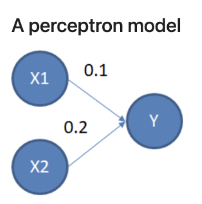

- Calculations done for a perceptron model with 4 samples and 2 features. 
- Initial assumed weights as 0.1 and 0.2

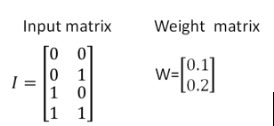

**Import libraries**

In [1]:
import numpy as np


**Input**

In [2]:
# Define input features
input_features = np.array([[0,0], [0,1],[1,0],[1,1]])
print(input_features.shape)
input_features

(4, 2)


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

**Output**

In [3]:
# Define target ouput
target_output=np.array([[0,1,1,1]])

#Reshaping the target output into vector:
target_output = target_output.reshape(4,1)
print(target_output.shape)
target_output

(4, 1)


array([[0],
       [1],
       [1],
       [1]])

**Weights and Learning rate**

In [4]:
weights = np.array([[0.1],[0.2]])
print('weights shape',weights.shape,'\n')
print('weights values\n',weights)

### Define learning rate
lr = 0.08

weights shape (2, 1) 

weights values
 [[0.1]
 [0.2]]


# <font color=blue> 1. Forward Propagation

**Adder function**

In [5]:
Weighted_sum = np.dot(input_features,weights)   # dot command for row by column multiplication
print('after adder\n',Weighted_sum)

after adder
 [[0. ]
 [0.2]
 [0.1]
 [0.3]]


**Activation Function**

Input to activation function is the adder function i.e. the weighted sum.

In [6]:
## Define Sigmoid Function

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
# Call function 

yo = sigmoid(Weighted_sum)
print('yo predicted o/p\n',yo)

yo predicted o/p
 [[0.5       ]
 [0.549834  ]
 [0.52497919]
 [0.57444252]]


Above is the predicted output yo i.e. after the forward propagation is complete.

# <font color=blue> 2. Error calculation

In [8]:
#Calculating Error
error = (1/2)*pow(target_output-yo,2)
print('mse=\n',error)

x=error.sum() ### total error
print("\ntotal error=","\n", x)

mse=
 [[0.125     ]
 [0.10132471]
 [0.11282239]
 [0.09054959]]

total error= 
 0.4296966869007126


# <font color=blue> 3. Backpropagation

In backpropagation to calculate error w.r.t weights i.e. rate of change of error w.r.t weights we need to go through chain rule as below. So error is made up of 3 parts as below-

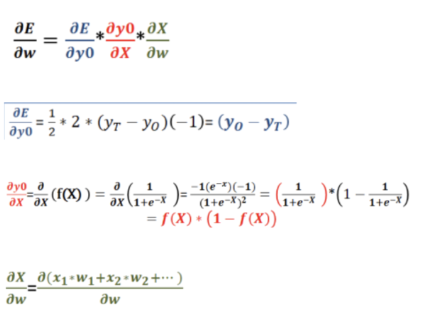

Also in code we calculate these parts seperately as-

1. Error/mse w.r.t yo
2. yo/f(X) w.r.t adder
3. Adder w.r.t weights

### <font color=blue> Part 1 - Error/mse w.r.t yo

In [9]:
dE_dyo = (yo-target_output)
dE_dyo

array([[ 0.5       ],
       [-0.450166  ],
       [-0.47502081],
       [-0.42555748]])

### <font color=blue> Part 2 - yo/f(X) w.r.t adder which X

In [10]:
## Define Derivative of sigmoid function:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

## Call Function
dyo_dX=sigmoid_der(yo)     # In 1/1+e^-x which is yo, the input X refers to o/p of adder.
dyo_dX

array([[0.23500371],
       [0.23201797],
       [0.2335362 ],
       [0.23045942]])

In [11]:
# Multiply 2 derivatives, element by element multiplication

z_delta=dE_dyo*dyo_dX

z_delta

array([[ 0.11750186],
       [-0.1044466 ],
       [-0.11093456],
       [-0.09807373]])

### <font color=blue> Part 3 - X/adder w.r.t weights

- The third derivative we need individually w.r.t each weight, here we have 2 weights
- So del(x1w1)/del(w1) is x1 feature only.
- So del(x2w2)/del(w2) is x2 feature only.
- Hence the 3rd derivative w.r.t each weight will be the respective input feature itself.

In [12]:
delX_delw1 = input_features[:,0]   # which is x1
print('Derivative w.r.t w1', delX_delw1)

delX_delw2 = input_features[:,1]   # which is x2
print('Derivative w.r.t w2',delX_delw2)

# Multiply this 3rd derivative with product of 2 derivates already calculated
dE_dw1 = np.dot(delX_delw1, z_delta)   
print('\nRate of change of error w.r.t w1',dE_dw1)

# Multiply this 3rd derivative with product of 2 derivates already calculated
dE_dw2 = np.dot(delX_delw2, z_delta)  
print('Rate of change of error w.r.t w2',dE_dw2)

Derivative w.r.t w1 [0 0 1 1]
Derivative w.r.t w2 [0 1 0 1]

Rate of change of error w.r.t w1 [-0.20900829]
Rate of change of error w.r.t w2 [-0.20252033]


### <font color=blue> 4.Updated weights to be used in next epoch


In [13]:
old_w1 = weights[0]
old_w2 = weights[1]
print('Old weights', old_w1,old_w2)

Old weights [0.1] [0.2]


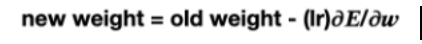

In [14]:
#### Update/reduce the weights by an amount of rate of change of error ####


w1_upt = old_w1-(lr)*dE_dw1
w2_upt = old_w2-(lr)*dE_dw2

print("Updated w1 1st epoch=","\n", w1_upt)
print("\nUpdated w2 1st epoch=","\n", w2_upt)

Updated w1 1st epoch= 
 [0.11672066]

Updated w2 1st epoch= 
 [0.21620163]
